# 以少量資料集從頭訓練一個卷積神經網路

Data : 
https://www.kaggle.com/c/dogs-vs-cats/data

In [1]:
import os, shutil

In [2]:
# 解壓縮資料夾所在的目錄路徑
original_dataset_dir = r'D:\Anaconda3\Scripts\5 上課資料\電腦視覺與人機互動\20191031HW\dogs-vs-cats\train\train' 
# 用來儲存少量資料集的目錄位置
base_dir = r'D:\Anaconda3\Scripts\5 上課資料\電腦視覺與人機互動\20191031HW\cats_and_dogs_small' 
# 如果目錄不存在，才建立目錄
if not os.path.isdir(base_dir): os.mkdir(base_dir)

In [3]:
# 分拆成訓練、驗證與測試目錄位置
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')  
if not os.path.isdir(validation_dir): os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)

In [4]:
# 用來訓練貓圖片的目錄位置
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir): 
    os.mkdir(train_cats_dir)

# 用來訓練狗圖片的目錄位置
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir): 
    os.mkdir(train_dogs_dir)

# 用來驗證貓圖片的目錄位置
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir): 
    os.mkdir(validation_cats_dir)

# 用來驗證狗圖片的目錄位置
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir): 
    os.mkdir(validation_dogs_dir)

# 用來測試貓圖片的目錄位置
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir): 
    os.mkdir(test_cats_dir)

# 用來測試狗圖片的目錄位置
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir): 
    os.mkdir(test_dogs_dir)

In [5]:
# 複製前面 1000 張貓圖片到 train_cats_dir 訓練目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張貓圖片到 validation_cats_dir 驗證目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張貓圖片到 test_cats_dir 測試目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
# 複製前面 1000 張狗圖片到 train_dogs_dir 訓練目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張狗圖片到 validation_dogs_dir 驗證目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張狗圖片到 test_dogs_dir 測試目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('複製完成')

複製完成


In [8]:
# 計算每個訓練/驗證/測試分組中的圖片數量
print('訓練用的貓照片張數:', len(os.listdir(train_cats_dir)))
print('訓練用的狗照片張數:', len(os.listdir(train_dogs_dir)))
print('驗證用的貓照片張數:', len(os.listdir(validation_cats_dir)))
print('驗證用的狗照片張數:', len(os.listdir(validation_dogs_dir)))
print('測試用的貓照片張數:', len(os.listdir(test_cats_dir)))
print('測試用的狗照片張數:', len(os.listdir(test_dogs_dir)))

訓練用的貓照片張數: 1000
訓練用的狗照片張數: 1000
驗證用的貓照片張數: 500
驗證用的狗照片張數: 500
測試用的貓照片張數: 500
測試用的狗照片張數: 500


In [9]:
# CNN
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [12]:
#設定訓練、測試資料的 Python 產生器，並將圖片像素值依 1/255 比例重新壓縮到 [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,               # 目標目錄
    target_size=(150, 150),  # 調整所有影像大小成 150x150
    batch_size=20,
    class_mode='binary')     # 因為使用二元交叉熵 binary_crossentropy 作為損失值，所以需要二位元標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 40s 396ms/step - loss: 0.6881 - acc: 0.5325 - val_loss: 0.6696 - val_acc: 0.6150
Epoch 2/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6498 - acc: 0.6165 - val_loss: 0.6329 - val_acc: 0.6500
Epoch 3/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6061 - acc: 0.6690 - val_loss: 0.6119 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5673 - acc: 0.7050 - val_loss: 0.6512 - val_acc: 0.6360
Epoch 5/30
100/100 [==============================] - 13s 127ms/step - loss: 0.5456 - acc: 0.7195 - val_loss: 0.5886 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 13s 125ms/step - loss: 0.5258 - acc: 0.7390 - val_loss: 0.5756 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 13s 128ms/step - loss: 0.4983 - acc: 0.7595 - val_loss: 0.5572 - val_acc: 0.7060
Epoch 8/30
100/100 [==============================] - 1

In [15]:
model.save('cats_and_dogs_small_1.h5')

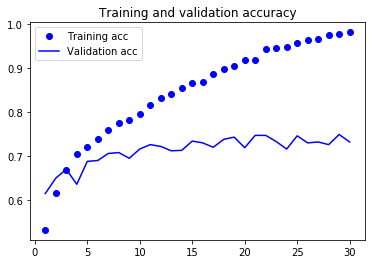

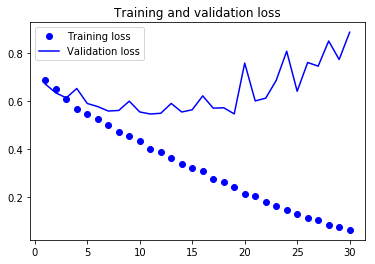

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

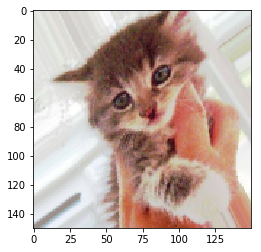

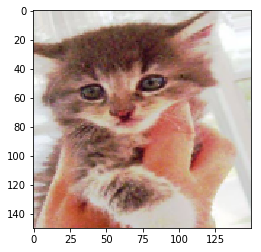

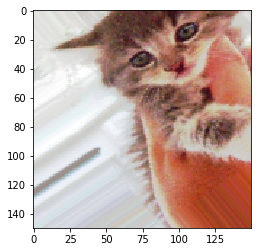

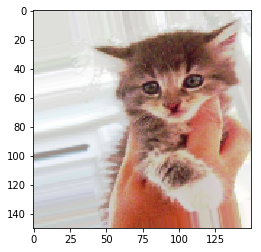

In [18]:
fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #  加入 Dropout 層 (丟棄 50 %)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1./255) # 請注意！驗證資料不應該擴充!!!

train_generator = train_datagen.flow_from_directory(
    train_dir,    # 目標目錄
    target_size=(150, 150), # 所有圖像大小調整成 150×150 
    batch_size=32,
    class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失，所以需要二元標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# 訓練
history = model.fit_generator(   
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 25s 249ms/step - loss: 0.6920 - acc: 0.5181 - val_loss: 0.6940 - val_acc: 0.5178
Epoch 2/100
100/100 [==============================] - 25s 250ms/step - loss: 0.6806 - acc: 0.5634 - val_loss: 0.6593 - val_acc: 0.6057
Epoch 3/100
100/100 [==============================] - 28s 282ms/step - loss: 0.6648 - acc: 0.5991 - val_loss: 0.6444 - val_acc: 0.6098
Epoch 4/100
100/100 [==============================] - 33s 334ms/step - loss: 0.6446 - acc: 0.6266 - val_loss: 0.6125 - val_acc: 0.6514
Epoch 5/100
100/100 [==============================] - 32s 318ms/step - loss: 0.6279 - acc: 0.6406 - val_loss: 0.6117 - val_acc: 0.6447
Epoch 6/100
100/100 [==============================] - 35s 353ms/step - loss: 0.6164 - acc: 0.6566 - val_loss: 0.6141 - val_acc: 0.6598
Epoch 7/100
100/100 [==============================] - 33s 329ms/step - loss: 0.6040 - acc: 0.6681 -

100/100 [==============================] - 33s 331ms/step - loss: 0.4093 - acc: 0.8053 - val_loss: 0.4477 - val_acc: 0.7893
Epoch 61/100
100/100 [==============================] - 34s 337ms/step - loss: 0.3897 - acc: 0.8228 - val_loss: 0.4386 - val_acc: 0.7964
Epoch 62/100
100/100 [==============================] - 35s 351ms/step - loss: 0.4043 - acc: 0.8091 - val_loss: 0.4471 - val_acc: 0.7919
Epoch 63/100
100/100 [==============================] - 34s 338ms/step - loss: 0.3938 - acc: 0.8203 - val_loss: 0.4373 - val_acc: 0.7925
Epoch 64/100
100/100 [==============================] - 33s 327ms/step - loss: 0.3979 - acc: 0.8134 - val_loss: 0.4371 - val_acc: 0.8164
Epoch 65/100
100/100 [==============================] - 33s 333ms/step - loss: 0.3985 - acc: 0.8197 - val_loss: 0.4513 - val_acc: 0.8084
Epoch 66/100
100/100 [==============================] - 33s 332ms/step - loss: 0.3928 - acc: 0.8156 - val_loss: 0.4091 - val_acc: 0.8299
Epoch 67/100
100/100 [==============================] 

In [21]:
model.save('cats_and_dogs_small_2.h5')

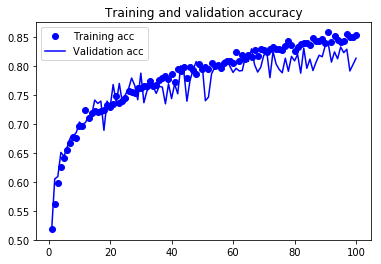

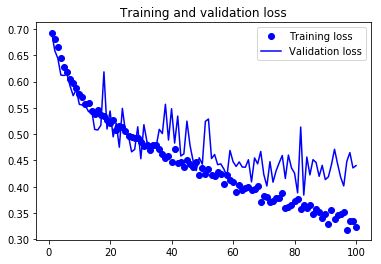

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()